# Scaling Exercises

<hr style="border:2px solid gray">

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import wrangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((1192919, 7), (511252, 7), (426043, 7))

In [4]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips
553191,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0
1209132,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0
174634,4.0,2.0,2040.0,138000.0,1954.0,2553.05,6037.0
170584,3.0,2.0,1834.0,263870.0,1959.0,3139.76,6059.0
2001226,2.0,2.0,1225.0,335603.0,1975.0,3461.38,6059.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 553191 to 1333156
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1192919 non-null  float64
 1   bathrooms   1192919 non-null  float64
 2   sqft        1192919 non-null  float64
 3   home_value  1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   yearly_tax  1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


<b>Note</b>:
<br>

We should now determine what columns we want to scale.
<br>

Does it make sense to scale ```fips``` , ```year_built``` or our target variable ```home_value```?

<br>

- We do not want to scale our target ```home_value```
- It does not really make sense to scale ```fips``` or ```year_built```

In [6]:
#make a copy of the df so we don't mess with the original
train_scaled = train.copy()

In [7]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft', 'yearly_tax']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [8]:
#take a look at our scaled data
train_scaled.head()

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips
553191,0.16,0.1,0.002928,373090.0,1923.0,0.004593,6037.0
1209132,0.12,0.1,0.002847,74070.0,1937.0,0.000979,6037.0
174634,0.16,0.1,0.003839,138000.0,1954.0,0.002555,6037.0
170584,0.12,0.1,0.003451,263870.0,1959.0,0.003145,6059.0
2001226,0.08,0.1,0.002305,335603.0,1975.0,0.003469,6059.0


Text(0.5, 1.0, 'Scaled')

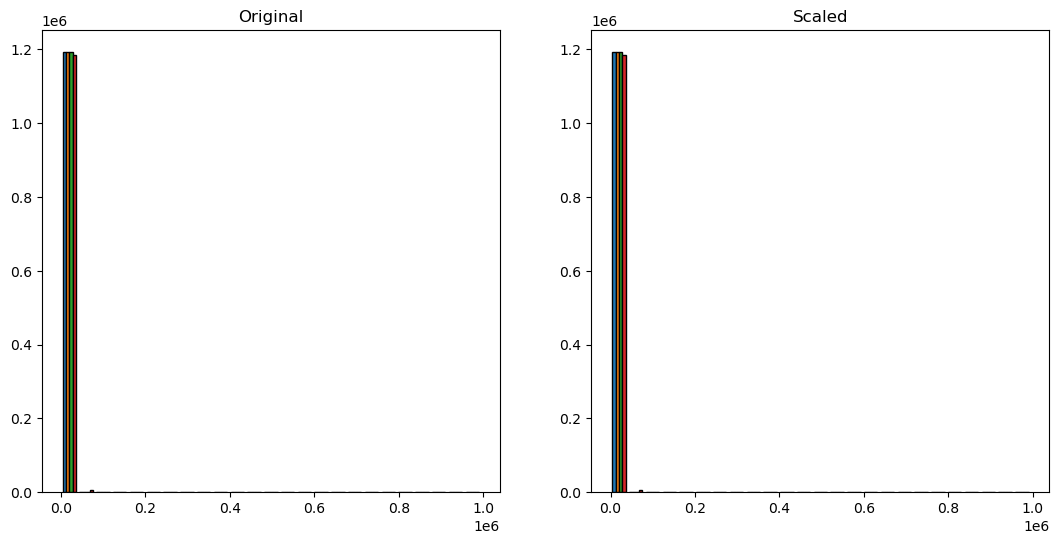

In [9]:
#minmax for all columns that we are going to scale
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Scaled')

<hr style="border:1px solid black">

### #1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

<b>Let's create a function that we can use later in the exercises as well</b>

In [10]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

<b>MinMaxScaler Visualized</b>:

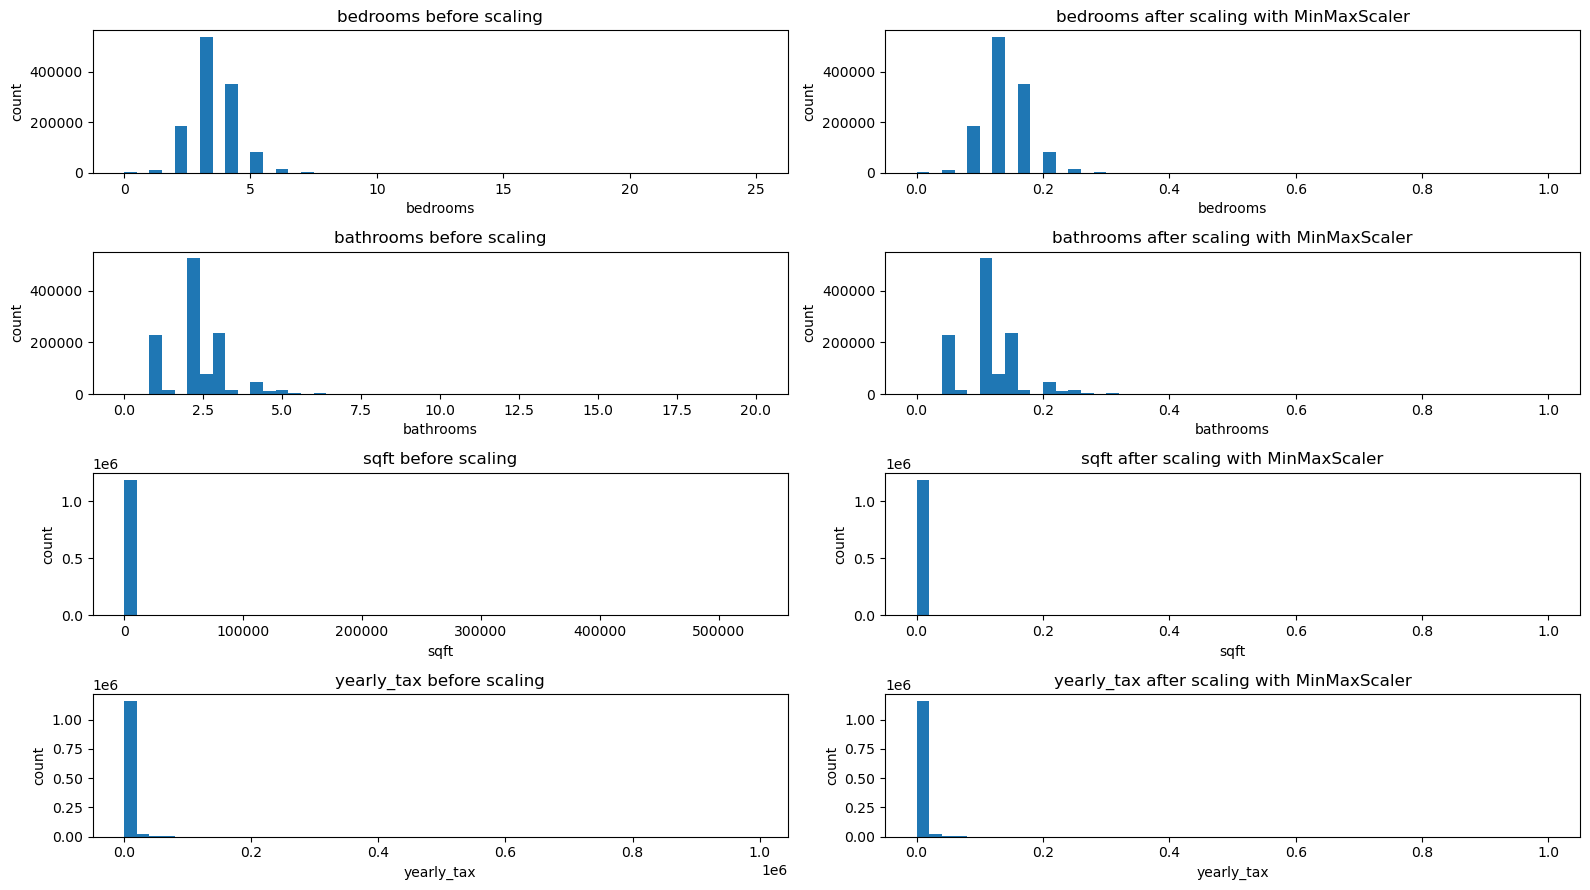

In [11]:
#we can use the function we just created on MinMaxScaler
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<b>StandardScaler Visualized</b>

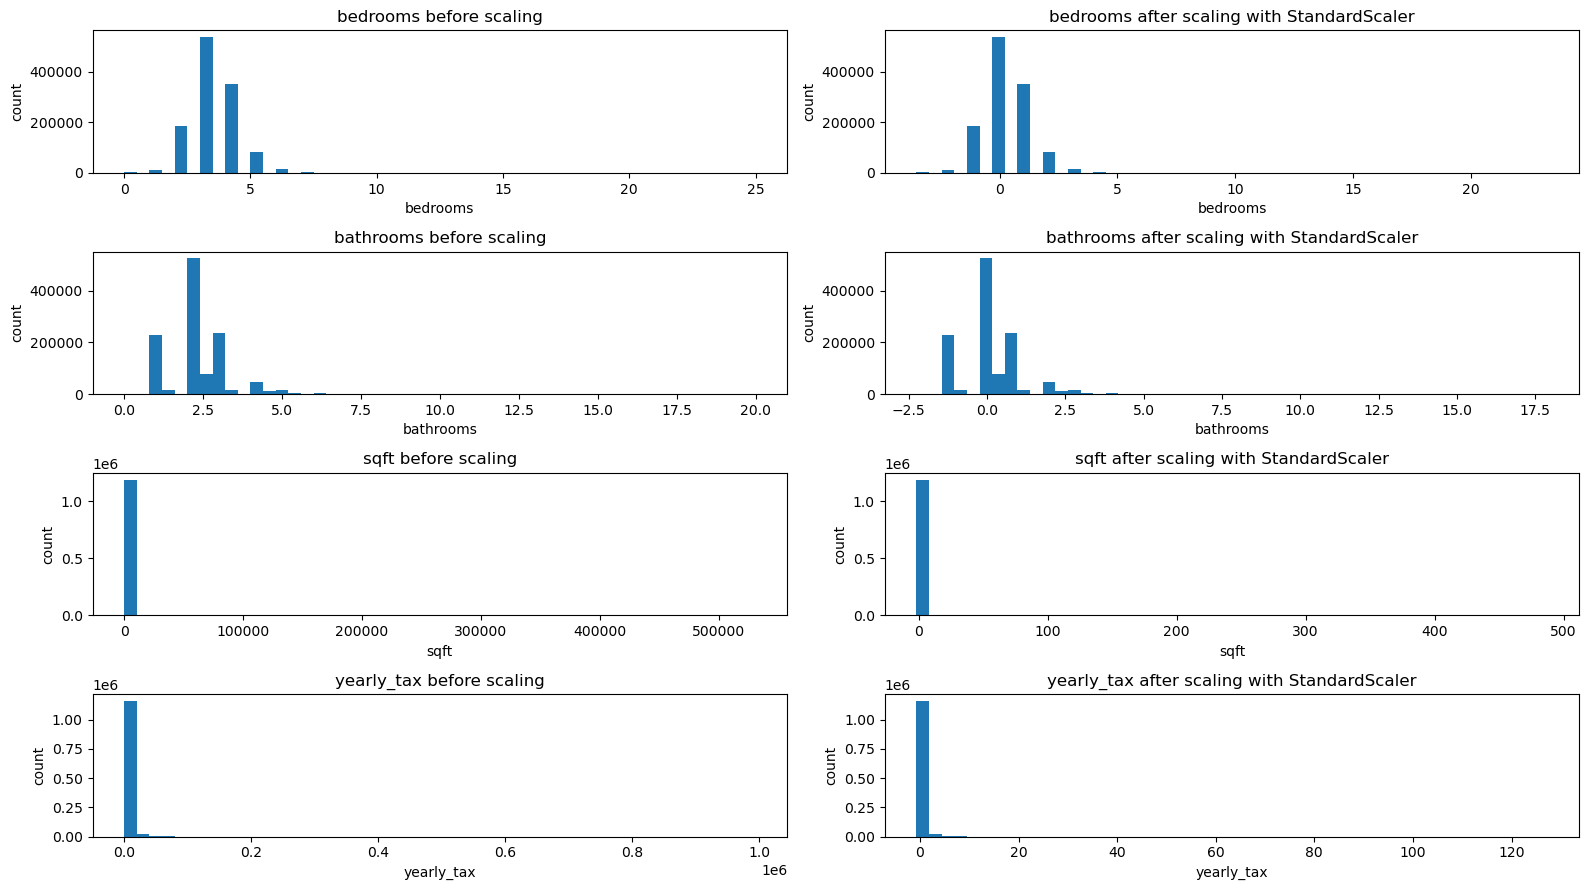

In [12]:
#Now, let's use it on StandarScaler
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

<b> RobustScaler Visualized </b>

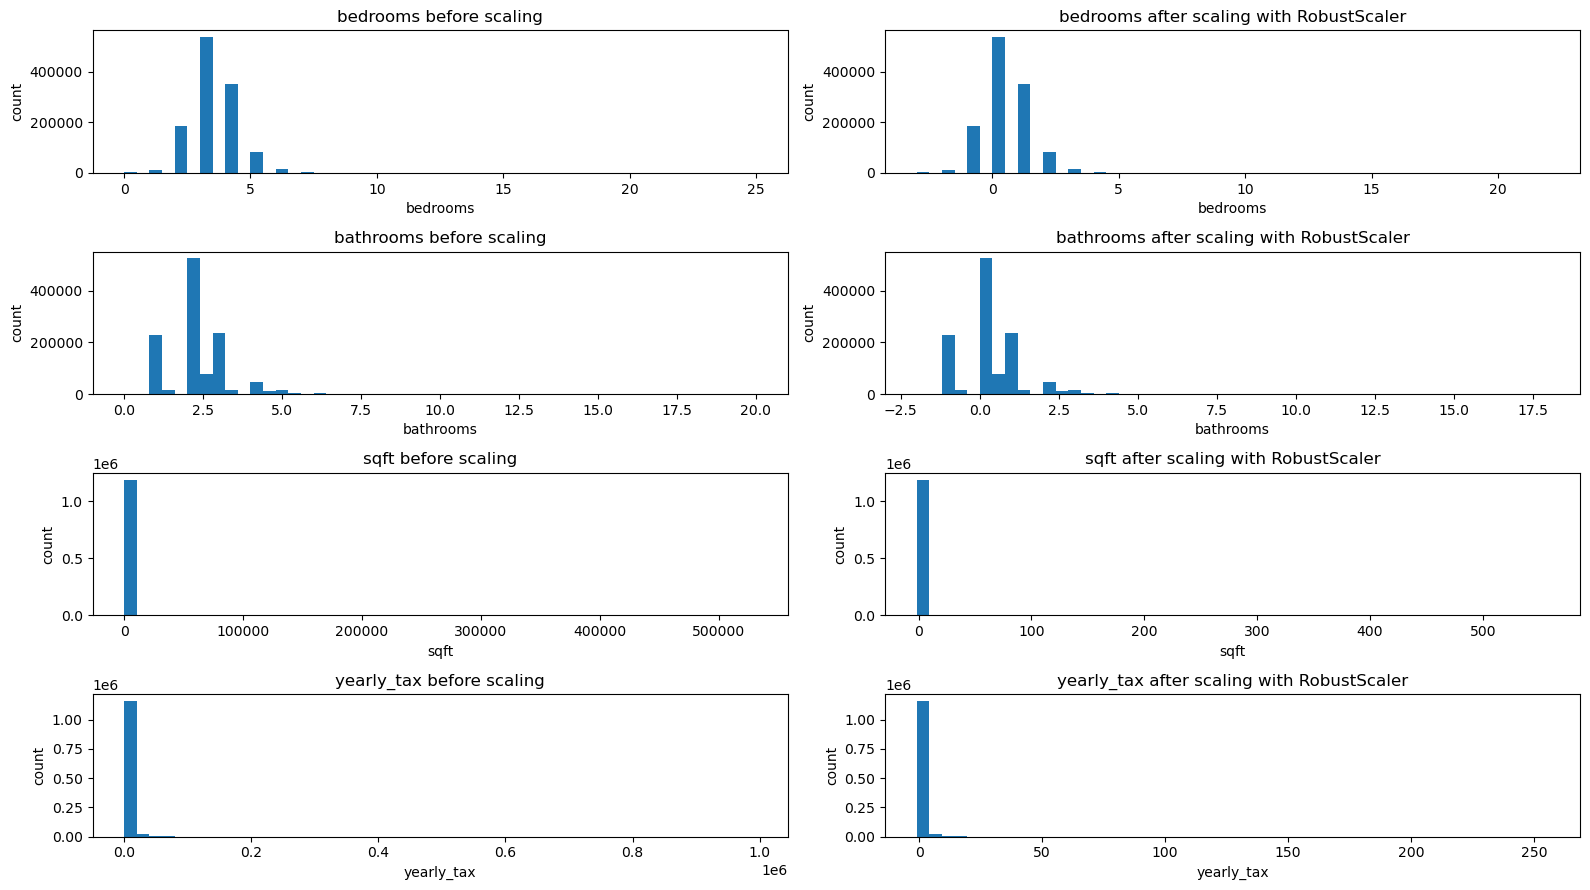

In [13]:
#Now, let's use it on RobustScaler
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

<hr style="border:1px solid black">

### #2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

<b>Note</b>: 
- Inverse_transform reverts the data back to the original data

In [14]:
#min max scaler for yearly_tax
#create
scaler_minmax = MinMaxScaler()
#fit
scaler_minmax.fit(train[['yearly_tax']])
#use
train['minmax_yearly_tax'] = scaler_minmax.transform(train[['yearly_tax']])
#use inverse
train['mm_tx_inverse']= scaler_minmax.inverse_transform(train[['minmax_yearly_tax']])

<b>Let's create a visual that show us inverse_transform</b>:
    <br>
- before scaling, after scaling and after using inverse_transform

In [15]:
def vis_scaler_inverse(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 3, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_inverse = df.copy()
    df_inverse[columns_to_scale] = scaler.inverse_transform(df[columns_to_scale])

    for (ax1, ax2, ax3), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
        ax3.hist(df_inverse[col], bins=bins)
        ax3.set(title=f'{col} after inverse transform {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

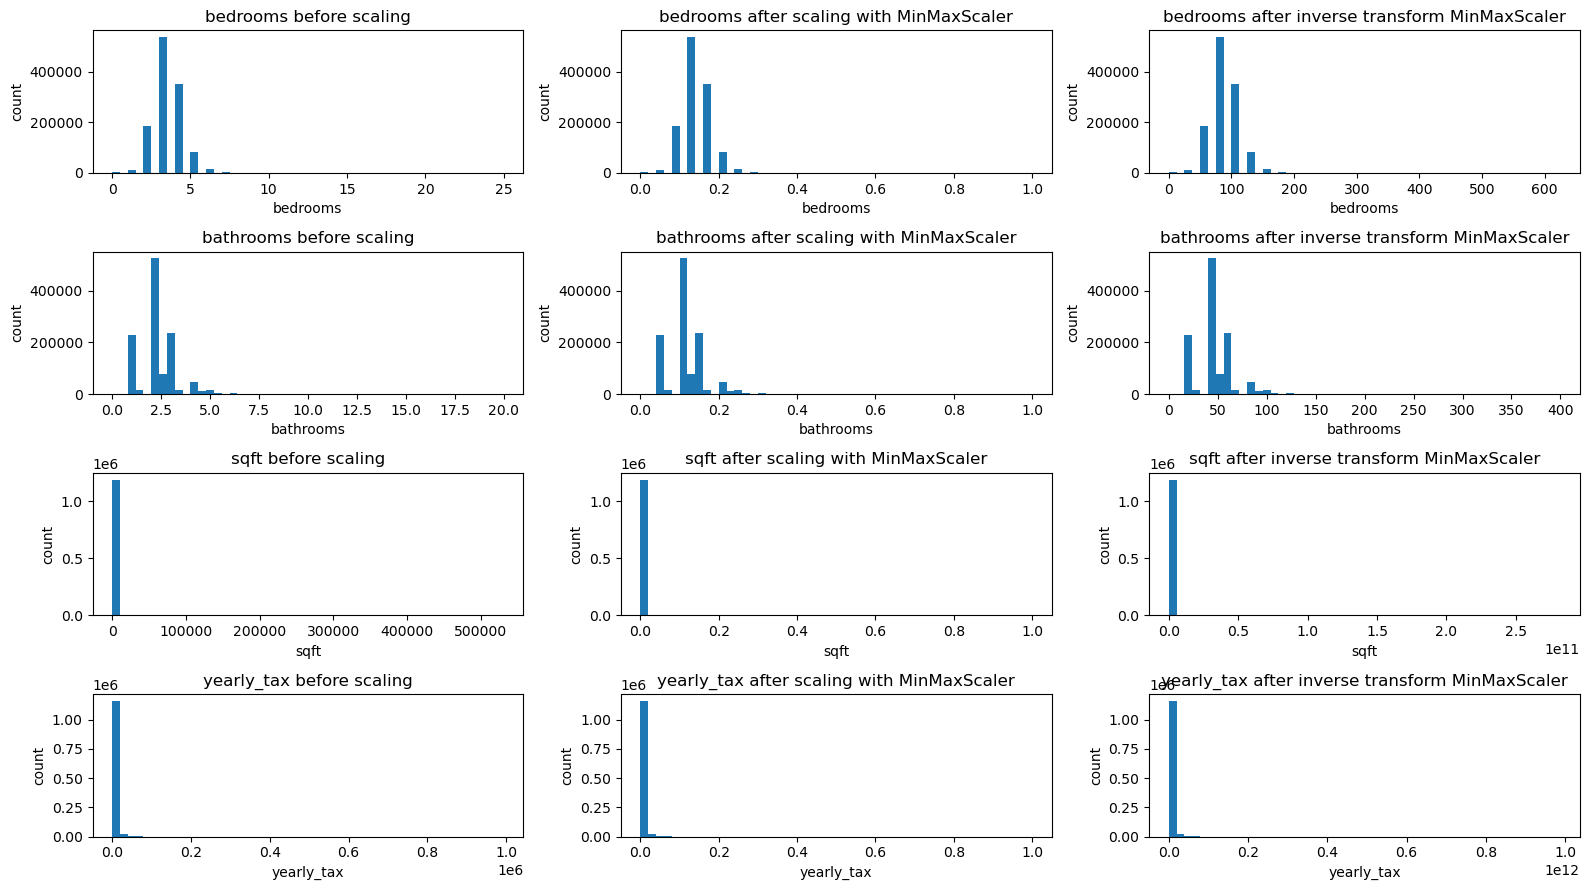

In [16]:
#Use the new function on MinMaxScaler to visualize all three:
## original, scaled, and inverse
vis_scaler_inverse(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<hr style="border:1px solid black">

### #3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

<b>Note</b>:
- Quantile Transformation is a non-parametric data transformation technique to transform your numerical data distribution into normal distribution.

In [17]:
#Use QuantileTransformer specifically on "yearly_tax" to see what we get

#create
quantile_mc = QuantileTransformer(output_distribution='normal')
#fit
quantile_mc.fit(train[['yearly_tax']])
#transform and create columns
train['yearly_tax_quantile'] = quantile_mc.transform(train[['yearly_tax']])

In [18]:
#take a look at all our new columns
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips,minmax_yearly_tax,mm_tx_inverse,yearly_tax_quantile
553191,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0,0.004593,4579.25,0.159358
1209132,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0,0.000979,986.55,-1.665496
174634,4.0,2.0,2040.0,138000.0,1954.0,2553.05,6037.0,0.002555,2553.05,-0.666680
170584,3.0,2.0,1834.0,263870.0,1959.0,3139.76,6059.0,0.003145,3139.76,-0.387407
2001226,2.0,2.0,1225.0,335603.0,1975.0,3461.38,6059.0,0.003469,3461.38,-0.249615


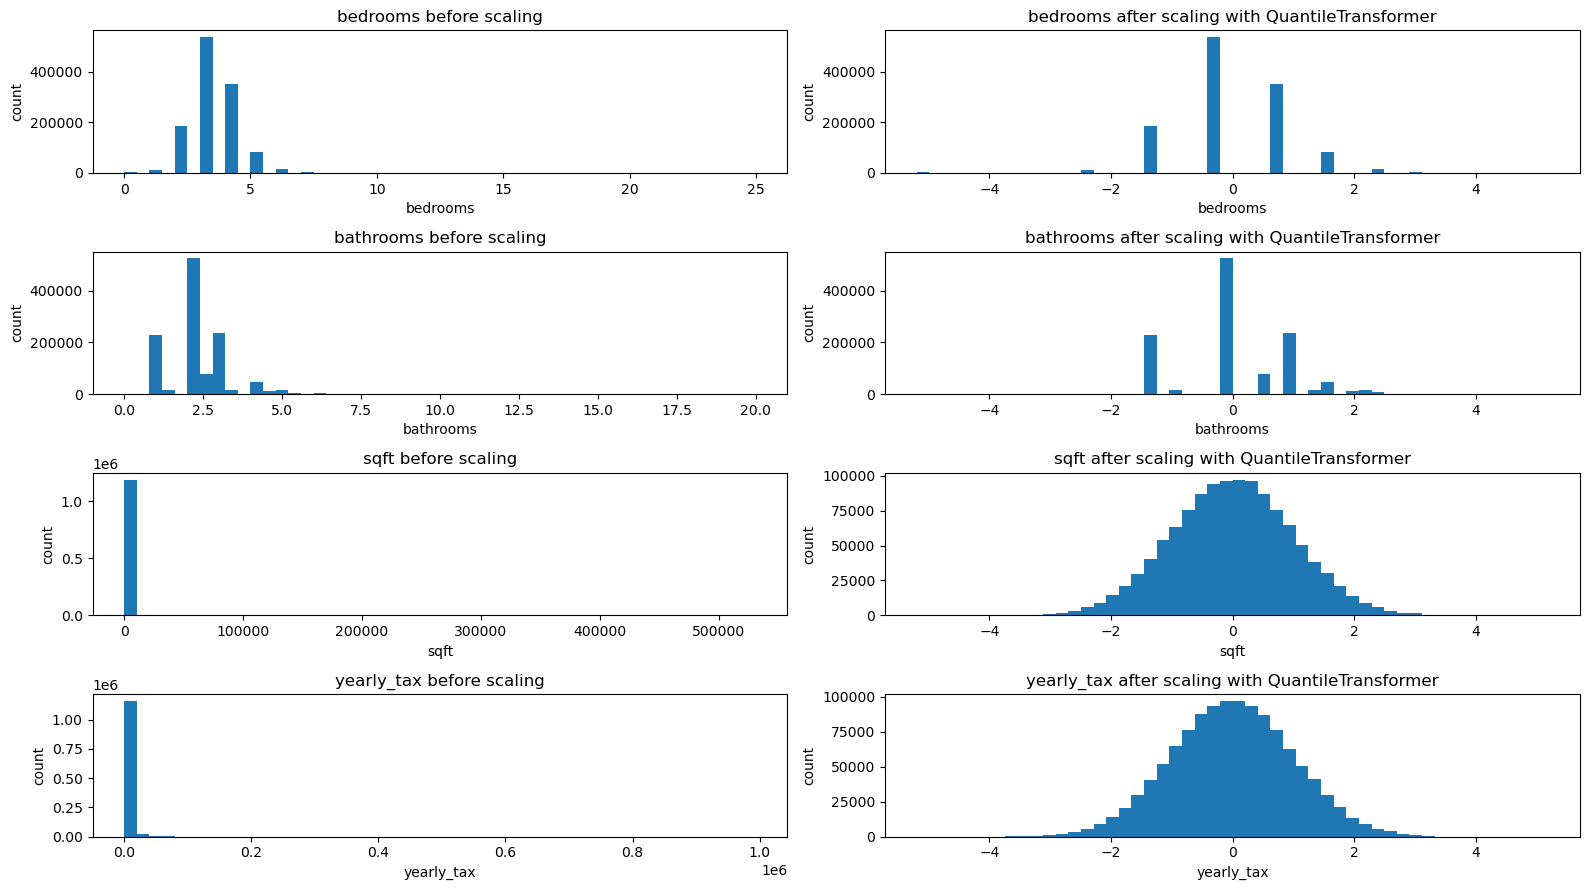

In [19]:
# Let's use our function on QuantileTransformer 
## to loop through all scaled columns
visualize_scaler(scaler=QuantileTransformer(output_distribution = 'normal'), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<hr style="border:1px solid black">

### #4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

<b>Note</b>:
    <br>
- output_distribution defaults to uniform distribution.

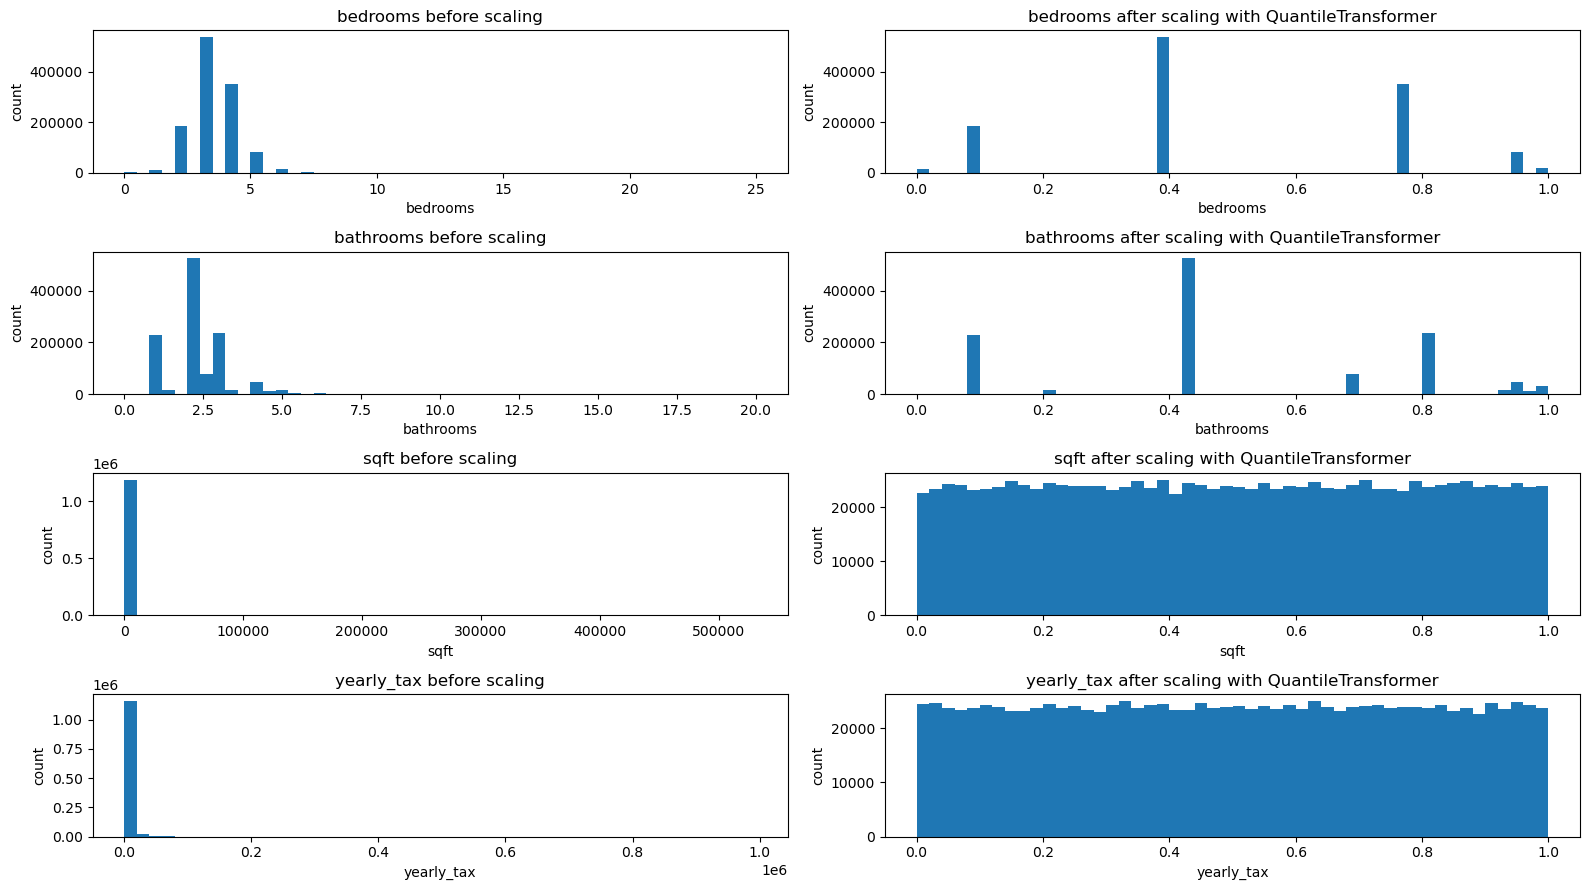

In [20]:
# Let's use our function on QuantileTransformer without output kwarg
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<hr style="border:1px solid black">

### #5.  Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [21]:
def Min_Max_scaler(X_train, X_validate, X_test):
    '''
    Takes in three pandas DataFrames: X_train, X_validate, X_test
    output: scaler object, sclaer versions of X_train, X_validate, and X_test
    
    This function assumes the independent variables being fed into it as arguements 
    are all consisting of continuous features (numeric variables)
    '''
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index=X_validate.index, columns=X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [22]:
X_train= train[columns_to_scale]
X_validate = validate[columns_to_scale]
X_test = test[columns_to_scale]

In [23]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaler= Min_Max_scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bedrooms,bathrooms,sqft,yearly_tax
553191,0.16,0.1,0.002928,0.004593
1209132,0.12,0.1,0.002847,0.000979
174634,0.16,0.1,0.003839,0.002555
170584,0.12,0.1,0.003451,0.003145
2001226,0.08,0.1,0.002305,0.003469


<hr style="border:1px solid black">
<hr style="border:1px solid black">

### Create a Pipeline Function

In [24]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'sqft', 'yearly_tax'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [25]:
#Let's assign our new function to the appropriate variables
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [26]:
#call our new dataframe
train_scaled.head()

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips,minmax_yearly_tax,mm_tx_inverse,yearly_tax_quantile
553191,0.16,0.1,0.002928,373090.0,1923.0,0.004593,6037.0,0.004593,4579.25,0.159358
1209132,0.12,0.1,0.002847,74070.0,1937.0,0.000979,6037.0,0.000979,986.55,-1.665496
174634,0.16,0.1,0.003839,138000.0,1954.0,0.002555,6037.0,0.002555,2553.05,-0.666680
170584,0.12,0.1,0.003451,263870.0,1959.0,0.003145,6059.0,0.003145,3139.76,-0.387407
2001226,0.08,0.1,0.002305,335603.0,1975.0,0.003469,6059.0,0.003469,3461.38,-0.249615
